In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras import utils as np_utils


from utils.data import extract_eeg_data, multi_to_binary_classification, split_dataset, dict_to_arr
from utils.labels import get_pss_labels, get_stai_labels
from utils.valid_recs import get_valid_recs
from features import all_features, hjorth_features
from classifiers import knn_classification, svm_classification, cnn_classification, EEGNet_classification_2, EEGNet_classification_3, EEGNet_classification_TSGL
import utils.variables as v

from EEGModels import EEGNet,EEGNet_SSVEP,TSGLEEGNet


In [2]:
valid_recs = get_valid_recs(data_type='init', output_type = 'np')
print(f'Valid recs {valid_recs}')

x_dict_ = extract_eeg_data(valid_recs, data_type='init', output_type='np')


ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002


Filtering out invalid recordings

Data/ICA_data\sub-P010_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-002.mat not valid


ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Data/ICA_data\sub-P020_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P023_ses-S002_run-002.mat not valid
Returning valid recordings

Valid recs ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P

ERROR:root:2) Failed to read data for recording P028_S002_001
ERROR:root:2) Failed to read data for recording P028_S002_002


In [3]:
y_dict_ = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [4]:
print(f" Length of data after removing invalid labels: {len(x_dict_)}")
print(f" Lenght og labels after removing invalid labels: {len(y_dict_)}")


 Length of data after removing invalid labels: 103
 Lenght og labels after removing invalid labels: 103


In [5]:
x_dict, y_dict = multi_to_binary_classification(x_dict_, y_dict_)


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [6]:
print(f" Length of data after removing mildly stressed subjects: {len(x_dict_)}")
print(f" Lenght og labels after removing  mildly stressed subjects: {len(y_dict_)}")

 Length of data after removing mildly stressed subjects: 79
 Lenght og labels after removing  mildly stressed subjects: 79


In [7]:
train_data_dict, test_data_dict, val_data_dict, train_labels_dict, test_labels_dict, val_labels_dict = split_dataset(x_dict, y_dict)

In [8]:
print(f"Length of train data set: {len(train_data_dict)}")
print(f"Length of validation data set: {len(val_data_dict)}")
print(f"Length of test data set: {len(test_data_dict)}")

Length of train data set: 47
Length of validation data set: 16
Length of test data set: 16


In [9]:
train_data_arr = dict_to_arr(train_data_dict)
test_data_arr = dict_to_arr(test_data_dict)
val_data_arr = dict_to_arr(val_data_dict)

train_labels_arr = np.reshape(np.array(list(train_labels_dict.values())), (len(train_data_arr),1))
test_labels_arr = np.reshape(np.array(list(test_labels_dict.values())), (len(test_data_arr),1))
val_labels_arr = np.reshape(np.array(list(val_labels_dict.values())), (len(val_data_arr),1))

train_labels_arr[train_labels_arr == 2] = 1
test_labels_arr[test_labels_arr == 2] = 1
val_labels_arr[val_labels_arr == 2] = 1


print(f"Shape of train data set: {train_data_arr.shape}")
print(f"Shape of validation data set: {val_data_arr.shape}")
print(f"Shape of test data set: {test_data_arr.shape}")

Shape of train data set: (47, 8, 75000)
Shape of validation data set: (16, 8, 75000)
Shape of test data set: (16, 8, 75000)


In [13]:
print(train_labels_arr.shape)
print(val_labels_arr.shape)
print(test_labels_arr.shape)


(47, 1)
(16, 1)
(16, 1)
[[[ 176.56046496  169.17522672  166.83933005 ...   79.36128698
     72.92369365   33.03329823]
  [  -9.47181605  -51.50450932  -74.30761332 ...  125.77405162
    108.96015111   91.80628994]
  [  71.99018778   83.53544327   90.8250806  ...   67.15063024
     67.64766085   51.00812771]
  ...
  [ -23.05105877  -28.38653445  -31.26597997 ...   26.1782049
     21.95334358   18.6066447 ]
  [ 100.19381617  145.17249135  172.40644564 ...  156.00522048
    169.16462822  157.04637211]
  [  41.28636842   47.35224746   50.88059462 ...   15.36932308
     17.74105128    6.51935797]]

 [[  50.85728944 -129.81724304 -226.21582133 ...    8.46767461
    -32.85172101  -22.21515713]
  [  57.99478128  -56.7016248  -116.49922495 ...   14.89929669
    -11.06252622  -10.50772015]
  [  77.79924029  -73.93169873 -154.00387943 ...   21.66554254
    -22.40686419  -20.33516396]
  ...
  [  10.3592385   -16.03318607  -31.12930067 ...    5.17298471
     -2.9929904    -4.15058907]
  [ 172.29831

Epoch 1/100

Epoch 1: val_loss did not improve from inf
3/3 - 11s - loss: 0.8016 - accuracy: 0.5532 - val_loss: nan - val_accuracy: 0.4375 - 11s/epoch - 4s/step
Epoch 2/100

Epoch 2: val_loss did not improve from inf
3/3 - 9s - loss: 0.2035 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6875 - 9s/epoch - 3s/step
Epoch 3/100

Epoch 3: val_loss did not improve from inf
3/3 - 9s - loss: 0.0973 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.5625 - 9s/epoch - 3s/step
Epoch 4/100

Epoch 4: val_loss did not improve from inf
3/3 - 9s - loss: 0.0625 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.5625 - 9s/epoch - 3s/step
Epoch 5/100

Epoch 5: val_loss did not improve from inf
3/3 - 9s - loss: 0.0511 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.5625 - 9s/epoch - 3s/step
Epoch 6/100

Epoch 6: val_loss did not improve from inf
3/3 - 11s - loss: 0.0347 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.5625 - 11s/epoch - 4s/step
Epoch 7/100

Epoch 7: val_loss did not imp

KeyboardInterrupt: 

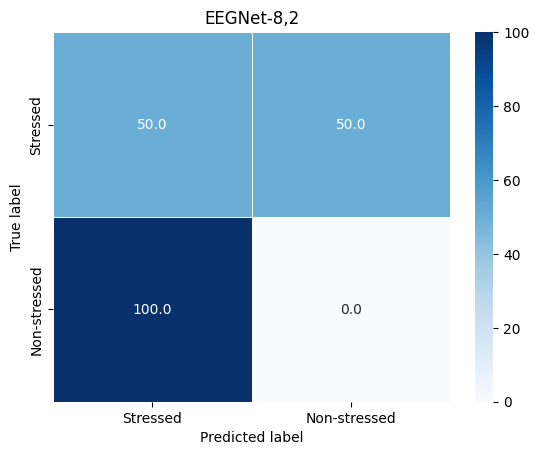

In [12]:
probs = EEGNet_classification_TSGL(train_data_arr, test_data_arr, val_data_arr, train_labels_arr, test_labels_arr, val_labels_arr)

In [13]:
print(probs)

[[0.5147185  0.4852815 ]
 [0.6053511  0.39464894]
 [0.52572787 0.47427213]
 [0.44409105 0.5559089 ]
 [0.52067876 0.47932115]
 [0.6464838  0.3535162 ]
 [0.57658863 0.42341143]
 [0.4933186  0.5066814 ]
 [0.56331766 0.4366823 ]
 [0.5608027  0.43919724]
 [0.5804242  0.4195758 ]
 [0.5702193  0.42978075]
 [0.5404461  0.45955393]
 [0.54185885 0.4581412 ]
 [0.72629195 0.2737081 ]
 [0.7594961  0.24050388]]


In [14]:
preds = probs.argmax(axis = -1)  
print(preds)

print(test_labels_arr.T)

[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
[[1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0]]


In [15]:
from pyriemann.utils.viz import plot_confusion_matrix

plot_confusion_matrix(preds, test_labels_arr, ['Stressed', 'Non-stressed'], title = 'EEGNet-8,2')

0.546875
